# Advanced Black-Litterman Model by davidyoon

Python symbol | Math Symbol | Comment
------------ | ------------- | -------------
rf | $ r $ | risk free rate
lmb	|$\lambda$	|risk aversion coefficient
C	|$C$	|Assets covariance matrix
V	|$V$	|Assets variances (diagonal in covariance matrix)
W	|$W$	|Assets weights
R	|$R$	|Assets returns
mean	|$\mu$	|Portfolio historical return
var	|$\sigma$|	Portfolio historical variance
Pi	|$\Pi$|	Portfolio equilibrium excess returns
tau	|$\tau$|	Scaling factor for Black-litterman


# Total

Historical Weights
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         1.02%  1.16%  0.07% 726710587335  5.08  4.28%   1.000 
KBOND      10.40%  1.47%  1.40% 726710587335  5.08  4.28%   0.052 1.000 
CBOND       5.76%  2.11%  0.67% 726710587335  5.08  4.28%   0.039 0.840 1.000 
OTHERBOND   6.69%  3.40%  2.58% 726710587335  5.08  4.28%   0.029 0.923 0.839 1.000 
AI         54.83%  3.94%  1.13% 726710587335  5.08  4.28%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    0.45%  3.24%  0.01% 726710587335  5.08  4.28%   0.187 0.041 0.044 0.051 -0.016 1.000 
STOCK      11.72%  4.97% 11.94% 726710587335  5.08  4.28%   -0.052 0.006 -0.003 0.004 0.035 -0.018 1.000 
BENEFICIAL  9.14%  9.30%  0.65% 726710587335  5.08  4.28%   -0.006 -0.037 0.005 -0.037 0.747 0.001 0.004 1.000 
Optimization based on Historical returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         0.00%  1.16%  0.07% 390954974025  6.60  2.88%   1.000 
KBO

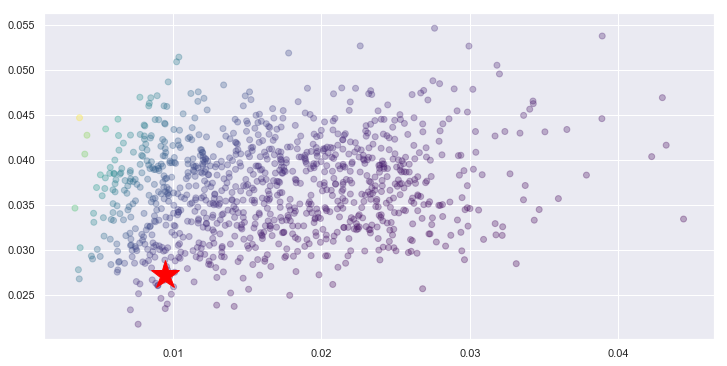

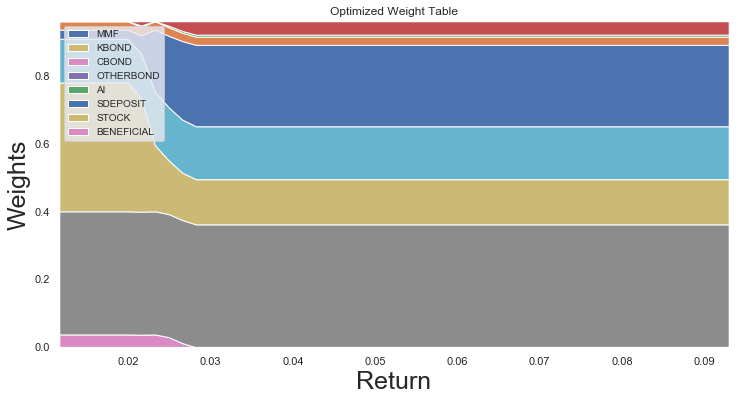

Optimization based on Equilibrium returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         3.20%  1.50%  0.07% 372339221705  6.47  2.21%   1.000 
KBOND      36.19%  1.96%  1.40% 372339221705  6.47  2.21%   0.052 1.000 
CBOND      13.29%  1.70%  0.67% 372339221705  6.47  2.21%   0.039 0.840 1.000 
OTHERBOND  12.29%  2.34%  2.58% 372339221705  6.47  2.21%   0.029 0.923 0.839 1.000 
AI         23.96%  2.31%  1.13% 372339221705  6.47  2.21%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    2.49%  1.50%  0.01% 372339221705  6.47  2.21%   0.187 0.041 0.044 0.051 -0.016 1.000 
STOCK       0.60% 18.82% 11.94% 372339221705  6.47  2.21%   -0.052 0.006 -0.003 0.004 0.035 -0.018 1.000 
BENEFICIAL  3.98%  1.84%  0.65% 372339221705  6.47  2.21%   -0.006 -0.037 0.005 -0.037 0.747 0.001 0.004 1.000 


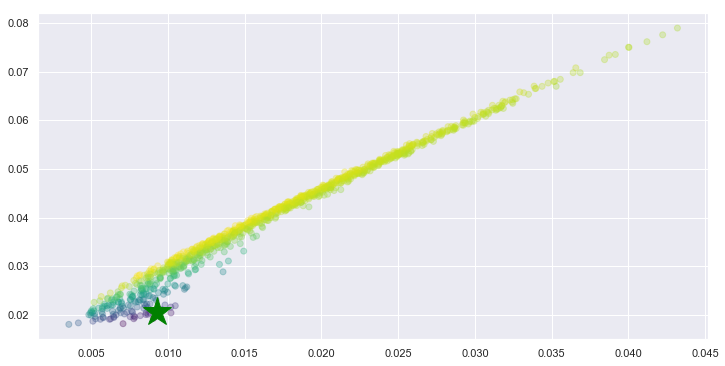

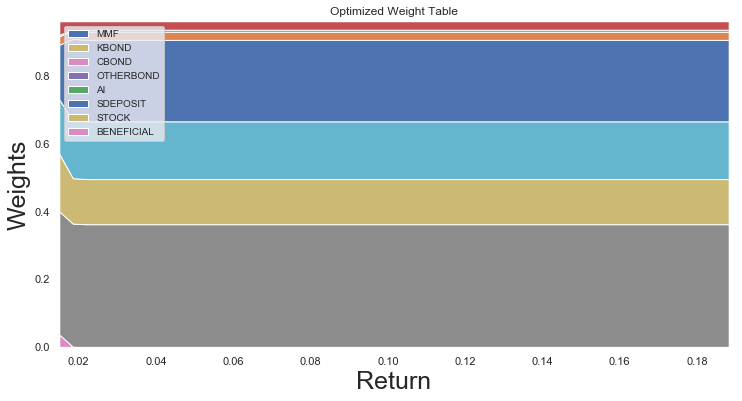

Views Matrix
[0.063 0.04 ]
Link Matrix
[[-1.  0.  0.  0.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  1.  0.  0.  0.]]
Optimization based on Equilibrium returns with adjusted views
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         3.20%  1.44%  0.07% 372339221705  6.47  2.56%   1.000 
KBOND      36.19%  1.72%  1.40% 372339221705  6.47  2.56%   0.052 1.000 
CBOND      13.29%  1.77%  0.67% 372339221705  6.47  2.56%   0.039 0.840 1.000 
OTHERBOND  12.29%  1.96%  2.58% 372339221705  6.47  2.56%   0.029 0.923 0.839 1.000 
AI         23.96%  3.85%  1.13% 372339221705  6.47  2.56%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    2.49%  1.50%  0.01% 372339221705  6.47  2.56%   0.187 0.041 0.044 0.051 -0.016 1.000 
STOCK       0.60% 17.65% 11.94% 372339221705  6.47  2.56%   -0.052 0.006 -0.003 0.004 0.035 -0.018 1.000 
BENEFICIAL  3.98%  4.77%  0.65% 372339221705  6.47  2.56%   -0.006 -0.037 0.005 -0.037 0.747 0.001 0.004 1.000 


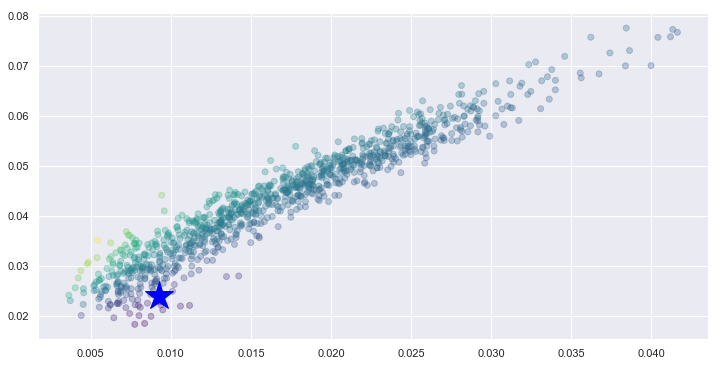

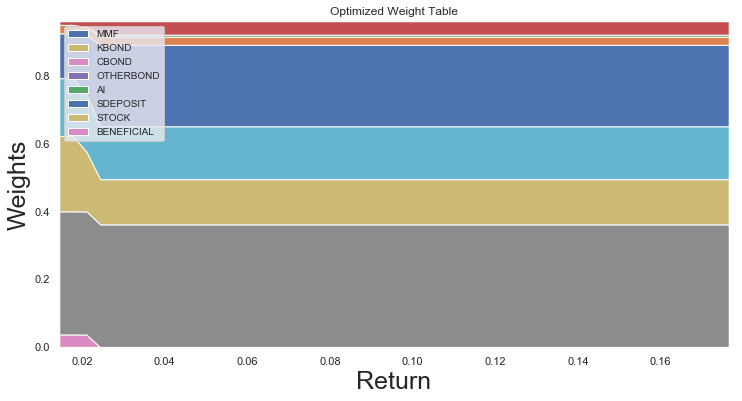

In [20]:


from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
import seaborn as sns
sns.set()
#from structures.quote import QuoteSeries
import scipy.optimize
import random
import pandas as pd
####################################
# Helper Functions
####################################
AUM = 76747e8
D1= 9.34 # KBOND(국공채+특수채)
D2=4.00 # CBOND(회사채+금융채)
D3=7.980 # OTHERBOND(이종채권)
D4=4.94 # AI(기업대출 등)
D5=0. # SDEPOSIT(구조화예금)
D6=0 # STOCK(주식)
D7= 4.7 # BENEFICIAL(비정형수익증권)

IC1 = 0.0064 # KBOND(국공채+특수채)
IC2 = 0.0758 # CBOND(회사채+금융채)
IC3 = 0.0261 # OTHERBOND(이종채권)
IC4 = 0.1055 # AI(기업대출 등)
IC5 = 0.034 # SDEPOSIT(구조화예금)
IC6 = 0.1385 # STOCK(주식)
IC7 = 0.1496 

# BY Risk Committee's Classification for investable assets
def load_data_net():
    symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
    cap = {'MMF':1140000e8, 'KBOND': 11651406e8, 'CBOND': 6460232e8, 'OTHERBOND':7497330e8, 'AI': 61457143e8, 'SDEPOSIT': 500000e8, 'STOCK': 13135986e8, 'BENEFICIAL': 10242857e8}
    #(Caps) MMF - index.go.kr(Nation's index System)
    # KBOND, CBOND - KRX INDEX FROM infomax
    # AI(0.857) + BENEFICIAL(0.143) - (0.7 X KOREA AI makret size + 0.3  X GLOBAL AI market size)*1.5(CPI)
    # OTEHR BOND - DLB(SAFE-SEIBRO) + ABS(KRX INDEX) + other(approximately)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('BLM_project/%s.csv' % s, index_col=None)
        prices = list(dataframe[s])[-1250:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data_net()

from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
#from structures.quote import QuoteSeries
import scipy.optimize
import random
from math import log, exp

####################################
# Helper Functions
####################################
# Function takes historical stock prices together with market capitalizations and calculates
# names       - array of assets' names
# prices      - array of historical (daily) prices
# caps        - array of assets' market capitalizations
# returns:
# names       - array of assets' names
# weights     - array of assets' weights (derived from mkt caps)
# expreturns  - expected returns based on historical data
# covars          - covariance matrix between assets based on historical data
def assets_meanvar(names, prices, caps):
        prices = matrix(prices)                         # create numpy matrix from prices
        weights = array(caps) / sum(caps)       # create weights
        # create matrix of historical returns
        rows, cols = prices.shape
        returns = empty([rows, cols-1])
        for r in range(rows):
                for c in range(cols-1):
                        p0, p1 = prices[r,c], prices[r,c+1]
                        returns[r,c] = (p1/p0)-1

        # calculate expected returns   
        expreturns = array([])
        for r in range(rows):
                expreturns = append(expreturns, mean(returns[r]))

        # calculate covariances
        covars = cov(returns)

        expreturns = (1 + expreturns)**250-1      # Annualize expected returns
        # adjusting expreturns symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']

        adjust = array([-0.004, 0.015, 0.02 , 0.03, 0.031, 0.016, 0.04, 0.08])
        expreturns = expreturns + adjust
        
        covars = covars * 250                     # Annualize covariances

        return names, weights, expreturns, covars
    
#       rf              risk free rate
#       lmb             lambda - risk aversion coefficient
#       C               assets covariance matrix
#       V               assets variances (diagonal in covariance matrix)
#       W               assets weights
#       R               assets returns
#       mean    portfolio historical return
#       var             portfolio historical variance
#       Pi              portfolio equilibrium excess returns
#       tau     scaling factor for Black-litterman

# Calculates portfolio mean return
def port_mean(W, R):
        return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
        return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
        return port_mean(W, R), port_var(W, C)

# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
        def fitness(W, R, C, r):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var = port_mean_var(W, R, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = 50 * abs(mean-r) #r은 optimized return
                return var + penalty
        frontier_mean, frontier_var, frontier_weights = [], [], []
        n = len(R)      # Number of assets in the portfolio
        for r in linspace(min(R), max(R), num=50): # Iterate through the range of returns on Y axis
                W = ones([n])/n       # start optimization with equal weights
              #  b_ = [(0.,1.) for i in range(n)]
#                 b_ = [(0.,0.029), (0.,0.38), (0.,0.18),(0., 0.175),(0.,0.2399),(0.,0.0499),(0.,0.02),(0.,0.05)] 
                b_ = [(0.,0.0379), (0.3619,0.3623), (0.1329,1.),(0.1229, 0.17),(0.,0.2396),(0.0240,0.0249),(0., 0.006),(0.,0.0398)]    # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
                c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.96 },  # Sum of weights must be 96%
                     {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM - W[3] * IC3 * AUM 
                      - W[4] * IC4 * AUM - W[5] * IC5 * AUM - W[6] * IC6 * AUM - W[7] * IC7 * AUM + 4320e8},  # sum of Credic IC
                     {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] + W[6] * R[6] + W[7] * R[7]- 0.02}, #Sum of port return
#                      {'type':'ineq', 'fun': lambda W: W[1] + W[2] - 0.45}#Sum of port return
                     )     
                optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
                if not optimized.success:
                        raise BaseException(optimized.message)
                # add point to the min-var frontier [x,y] = [optimized.x, r]
                frontier_mean.append(r)                                                 # return
                frontier_var.append(port_var(optimized.x, C))   # min-variance based on optimized weights
                frontier_weights.append(optimized.x)
        return array(frontier_mean), array(frontier_var), frontier_weights
                                                                                                       
# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def solve_weights(R, C, rf):
        def fitness(W, R, C, rf):
                mean, var = port_mean_var(W, R, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        
        n = len(R)
        W = ones([n])/n # start optimization with equal weights
        

  #      b_ = [(0.,1.) for i in range(n)] # 모두 자유로운 경우
        b_ = [(0.,0.0379), (0.3619,0.3623), (0.1329,1.),(0.1229, 0.17),(0.,0.2396),(0.0240,0.0249),(0., 0.006),(0.,0.0398)] # 45% 규정 없을 경우
        # b_ = [(0.019,0.029), (0.2599,0.2798), (0.X,0.18),(0.16, 0.175),(0.2099,0.2399),(0.035,0.0499),(0.01,0.02),(0.04,0.05)]# weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.96},  # Sum of weights must be 96%
              {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM - W[3] * IC3 * AUM 
                 - W[4] * IC4 * AUM - W[5] * IC5 * AUM - W[6] * IC6 * AUM - W[7] * IC7 * AUM + 4320e8},  # sum of Credic IC
              {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] + W[6] * R[6] + W[7] * R[7] - 0.02}, #Sum of port return
#               {'type':'ineq', 'fun': lambda W: W[1] + W[2] - 0.45} # Sum of bond's weight to company compliance
             )     
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s %8s %8s %8s %s" % ("Name", "Weight", "Return", "Dev", "CreditIC", " Duration", " PortReturn", "  Correlations"))
        for i in range(len(names)):
                print("%-10s %5.2f%% %5.2f%% %5.2f%% %5.f %5.2f %5.2f%%   " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5,
                                                                   AUM * (W[1] * IC1 + W[2] * IC2 + W[3] * IC3  
                                                                   + W[4] * IC4 + W[5] * IC5 + W[6] * IC6 + W[7] * IC7 + 0.4 * 0.00002),
                                                                   (W[1] * D1 + W[2] * D2 + W[3] * D3  + W[4] * D4 + W[5] * D5 + W[6] * D6 + W[7] * D7+ 0.04 * 5.1), 
                                                                   100 * (W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] + W[6] * R[6]
                                                                       + W[7] * R[7] + 0.04 * 0.04)
                                                                   ), end='')
                for j in range(i+1):
                        corr = C[i,j] / (sqrt(C[i,i]) * (sqrt(C[j,j]))) # calculate correlation from covariance
                        print("%.3f " % corr, end='')
                print()


        
                
def optimize_and_display(title, names, R, C, rf, color='red'):
        # optimize
        W = solve_weights(R, C, rf)
        mean, var = port_mean_var(W, R, C)                              # calculate tangency portfolio
        f_mean, f_var, f_weights = solve_frontier(R, C, rf)             # calculate min-var frontier
        # display min-var frontier
        print(title)
        figure(figsize=(12,6))
        print_assets(names, W, R, C)
        n = len(names)
#         ###draw assets### 
#         scatter([sqrt(C[i,i]) for i in range(n)], R, cmap='viridis', marker='x',color=color)  # draw assets
#         for i in range(n):  # draw labels
#                text(sqrt(C[i,i]), R[i], '  %s'%names[i], verticalalignment='center', color=color,fontsize= 10)
        
        plot(sqrt(var), mean, marker='*', color=color, markersize =30)  # point tangency portfolio
#         scatter(var**.5, mean, marker='o', color=color) # draw tangency portfolio
        
# #         plot(sqrt(f_var), f_mean, color=color, marker="*", markersize=10) # draw min-var frontier
        
#         xlabel('$\sigma$', fontsize=25), ylabel('$r$', fontsize=25)
        
        # Conducted Random Portfolio scatter 
        RandomReturn, RandomVar = [], []
        for i in range(1000):
            weight = np.random.random(8) 
            weight = weight/sum(weight)
            RandomReturn.append(port_mean(weight, R))
            RandomVar.append(sqrt(port_var(weight,C)))
        RandomReturn = array(RandomReturn)
        RandomVar = array(RandomVar)
        scatter(RandomVar, RandomReturn, c = (RandomReturn-rf)/RandomVar, cmap='viridis', marker = 'o' ,alpha = 0.3 )
#         plt.ylim(0.013,0.03)
#         plt.xlim(0.,0.02)
        grid(True)
        show()
        
        #Display weights
        m = empty([n, len(f_weights)]) # num = 20개 solve_frontier 함수에서 최적화 개수(r, linspace)
        for i in range(n): # 9
            for j in range(m.shape[1]): #20, shape[0]은 행 shape[1] 은 열
                m[i,j] = f_weights[j][i]        
    
        figure(figsize=(12,6))
    
        for i in range(n) :
            stackplot(f_mean, m, labels=[names[i]])
        margins(0,0)
        legend(loc = 'upper left', fontsize = 10)
        plt.title("Optimized Weight Table")
        xlabel('Return', fontsize=25)
        ylabel('Weights', fontsize=25)
        show()
    


# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(names, views):
    
        r, c = len(views), len(names)
        Q = [views[i][3] for i in range(r)]     # view matrix
        P = zeros([r, c])                       # link matrix
        nameToIndex = dict()
        for i, n in enumerate(names):
                nameToIndex[n] = i
        for i, v in enumerate(views):
                name1, name2 = views[i][0], views[i][2]
                P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
                P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
        return array(Q), P

####################################
# Main
####################################
 
# Load names, prices, capitalizations from the data source(yahoo finance)
names, prices, caps = load_data_net()
n = len(names)

# Estimate assets's expected return and covariances
names, W, R, C = assets_meanvar(names, prices, caps)
rf = .015      # Risk-free rate

print("Historical Weights")
print_assets(names, W, R, C)

# Calculate portfolio historical return and variance
mean, var = port_mean_var(W, R, C)

# Mean-Variance Optimization (based on historical returns)
print("="*100)
optimize_and_display('Optimization based on Historical returns', names, R, C, rf, color='red')
show()

# Black-litterman reverse optimization
lmb = (mean - rf) / var                         # Calculate return/risk trade-off
Pi = dot(dot(lmb, C), W)                        # Calculate equilibrium excess returns

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns', names, Pi+rf, C, rf, color='green')
show()

#Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
          ('MMF', '<', 'BENEFICIAL', 0.063),
          ('AI', '>', 'MMF', 0.04),
        ]
# views = [
#          ('AI', '>', 'KBOND', 0.04),
#          ('OTHERBOND', '>', 'CBOND', 0.015),
#         ('BENEFICIAL', '>', 'MMF', 0.05)
#         ]

#     ('AI', '>', 'MMF', 0.05),
#          ('MMF', '<', 'SDEPOSIT', 0.015),
#         ('MMF', '<', 'BENEFICIAL', 0.03)
Q, P = prepare_views_and_link_matrix(names, views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

tau = .03 # scaling factor

# Calculate omega - uncertainty matrix about views
omega = dot(dot(dot(tau, P), C), transpose(P)) # 0.025 * P * C * transpose(P)
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(dot(tau, C))
sub_b = dot(dot(transpose(P), inv(omega)), P)
sub_c = dot(inv(dot(tau, C)), Pi)
sub_d = dot(dot(transpose(P), inv(omega)), Q)
Pi = dot(inv(sub_a + sub_b), (sub_c + sub_d))

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns with adjusted views', names, Pi+rf, C, rf, color='blue')
show()



## GENERAL ACCOUNT

Historical Weights
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         1.02%  1.16%  0.07% 619475159220  5.08  4.00%   1.000 
KBOND      10.40%  1.47%  1.40% 619475159220  5.08  4.00%   0.052 1.000 
CBOND       5.76%  2.11%  0.67% 619475159220  5.08  4.00%   0.039 0.840 1.000 
OTHERBOND   6.69%  3.40%  2.58% 619475159220  5.08  4.00%   0.029 0.923 0.839 1.000 
AI         54.83%  3.94%  1.13% 619475159220  5.08  4.00%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    0.45%  3.24%  0.01% 619475159220  5.08  4.00%   0.187 0.041 0.044 0.051 -0.016 1.000 
STOCK      11.72%  4.97% 11.94% 619475159220  5.08  4.00%   -0.052 0.006 -0.003 0.004 0.035 -0.018 1.000 
BENEFICIAL  9.14%  6.30%  0.65% 619475159220  5.08  4.00%   -0.006 -0.037 0.005 -0.037 0.747 0.001 0.004 1.000 
Optimization based on Historical returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         0.67%  1.16%  0.07% 350052337600  6.25  3.02%   1.000 
KBO

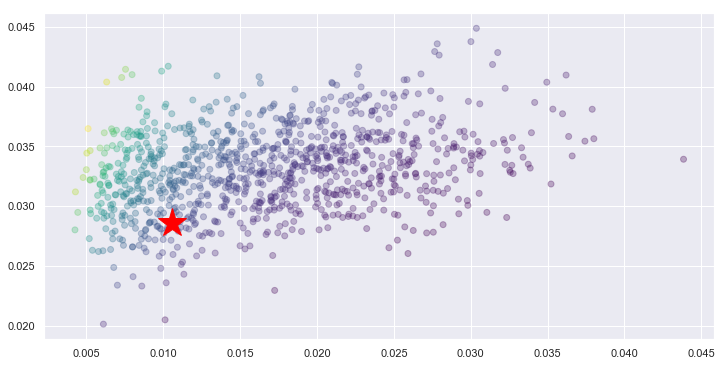

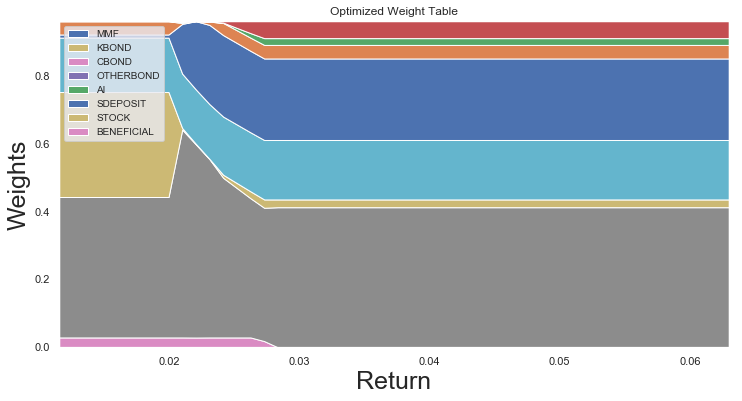

Optimization based on Equilibrium returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         2.90%  1.50%  0.07% 339595592431  6.16  2.39%   1.000 
KBOND      24.21%  1.91%  1.40% 339595592431  6.16  2.39%   0.052 1.000 
CBOND      11.86%  1.68%  0.67% 339595592431  6.16  2.39%   0.039 0.840 1.000 
OTHERBOND  23.17%  2.25%  2.58% 339595592431  6.16  2.39%   0.029 0.923 0.839 1.000 
AI         23.96%  2.22%  1.13% 339595592431  6.16  2.39%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    3.94%  1.50%  0.01% 339595592431  6.16  2.39%   0.187 0.041 0.044 0.051 -0.016 1.000 
STOCK       1.98% 17.01% 11.94% 339595592431  6.16  2.39%   -0.052 0.006 -0.003 0.004 0.035 -0.018 1.000 
BENEFICIAL  3.98%  1.81%  0.65% 339595592431  6.16  2.39%   -0.006 -0.037 0.005 -0.037 0.747 0.001 0.004 1.000 


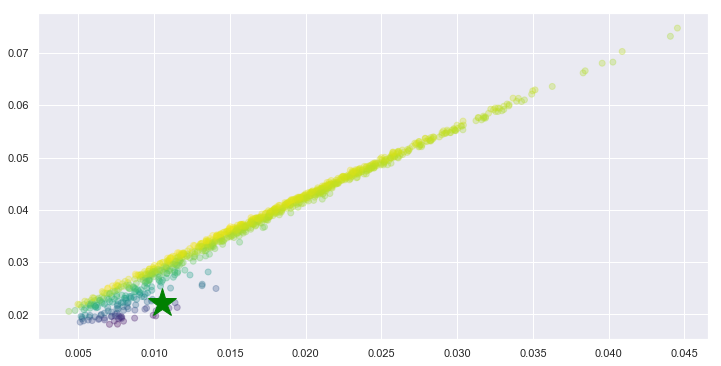

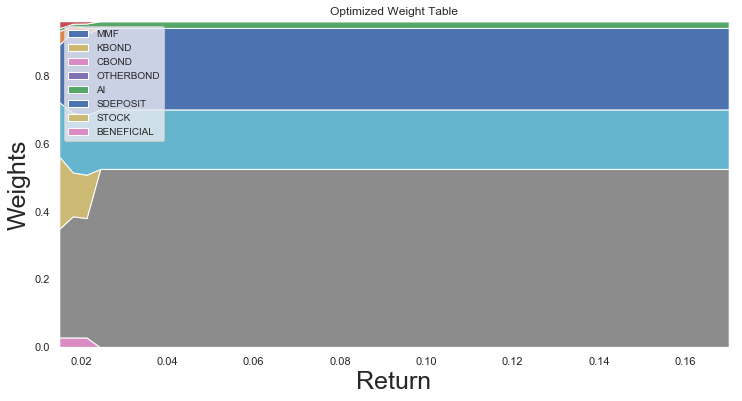

Views Matrix
[0.04 0.05]
Link Matrix
[[-1.  0.  0.  0.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  1.  0.  0.  0.]]
Optimization based on Equilibrium returns with adjusted views
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         2.90%  1.47%  0.07% 339595592434  6.16  2.86%   1.000 
KBOND      24.21%  1.75%  1.40% 339595592434  6.16  2.86%   0.052 1.000 
CBOND      11.86%  1.68%  0.67% 339595592434  6.16  2.86%   0.039 0.840 1.000 
OTHERBOND  23.17%  1.97%  2.58% 339595592434  6.16  2.86%   0.029 0.923 0.839 1.000 
AI         23.96%  4.33%  1.13% 339595592434  6.16  2.86%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    3.94%  1.50%  0.01% 339595592434  6.16  2.86%   0.187 0.041 0.044 0.051 -0.016 1.000 
STOCK       1.98% 17.15% 11.94% 339595592434  6.16  2.86%   -0.052 0.006 -0.003 0.004 0.035 -0.018 1.000 
BENEFICIAL  3.98%  3.63%  0.65% 339595592434  6.16  2.86%   -0.006 -0.037 0.005 -0.037 0.747 0.001 0.004 1.000 


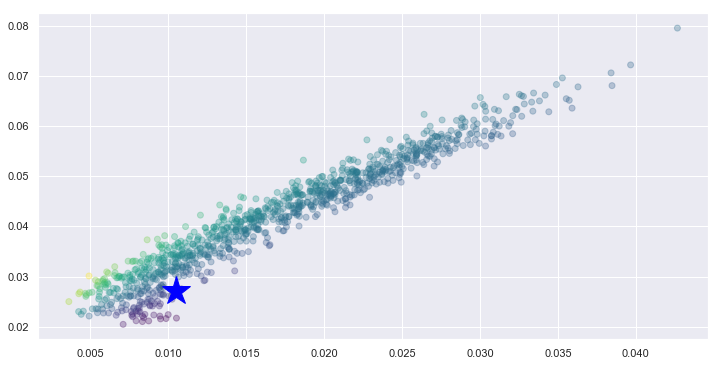

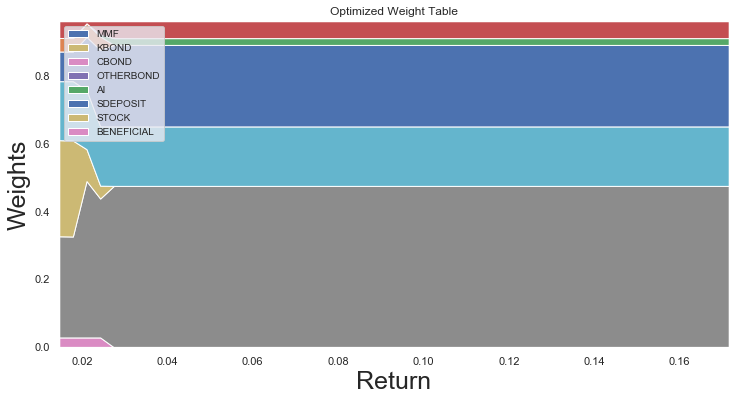

In [5]:


from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
import seaborn as sns
sns.set()
#from structures.quote import QuoteSeries
import scipy.optimize
import random
import pandas as pd
####################################
# Helper Functions
####################################
AUM = 65422e8
D1= 9.34 # KBOND(국공채+특수채)
D2=4.00 # CBOND(회사채+금융채)
D3=7.980 # OTHERBOND(이종채권)
D4=4.94 # AI(기업대출 등)
D5=0. # SDEPOSIT(구조화예금)
D6=0 # STOCK(주식)
D7= 4.7 # BENEFICIAL(비정형수익증권)

IC1 = 0.0064 # KBOND(국공채+특수채)
IC2 = 0.0758 # CBOND(회사채+금융채)
IC3 = 0.0261 # OTHERBOND(이종채권)
IC4 = 0.1055 # AI(기업대출 등)
IC5 = 0.034 # SDEPOSIT(구조화예금)
IC6 = 0.1385 # STOCK(주식)
IC7 = 0.1496 

# BY Risk Committee's Classification for investable assets
def load_data_net():
    symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
    cap = {'MMF':1140000e8, 'KBOND': 11651406e8, 'CBOND': 6460232e8, 'OTHERBOND':7497330e8, 'AI': 61457143e8, 'SDEPOSIT': 500000e8, 'STOCK': 13135986e8, 'BENEFICIAL': 10242857e8}
    #(Caps) MMF - index.go.kr(Nation's index System)
    # KBOND, CBOND - KRX INDEX FROM infomax
    # AI(0.857) + BENEFICIAL(0.143) - (0.7 X KOREA AI makret size + 0.3  X GLOBAL AI market size)*1.5(CPI)
    # OTEHR BOND - DLB(SAFE-SEIBRO) + ABS(KRX INDEX) + other(approximately)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('BLM_project/%s.csv' % s, index_col=None)
        prices = list(dataframe[s])[-1250:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data_net()

from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
#from structures.quote import QuoteSeries
import scipy.optimize
import random
from math import log, exp

####################################
# Helper Functions
####################################
# Function takes historical stock prices together with market capitalizations and calculates
# names       - array of assets' names
# prices      - array of historical (daily) prices
# caps        - array of assets' market capitalizations
# returns:
# names       - array of assets' names
# weights     - array of assets' weights (derived from mkt caps)
# expreturns  - expected returns based on historical data
# covars          - covariance matrix between assets based on historical data
def assets_meanvar(names, prices, caps):
        prices = matrix(prices)                         # create numpy matrix from prices
        weights = array(caps) / sum(caps)       # create weights
        # create matrix of historical returns
        rows, cols = prices.shape
        returns = empty([rows, cols-1])
        for r in range(rows):
                for c in range(cols-1):
                        p0, p1 = prices[r,c], prices[r,c+1]
                        returns[r,c] = (p1/p0)-1

        # calculate expected returns   
        expreturns = array([])
        for r in range(rows):
                expreturns = append(expreturns, mean(returns[r]))

        # calculate covariances
        covars = cov(returns)

        expreturns = (1 + expreturns)**250-1      # Annualize expected returns
        # adjusting expreturns symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']

        adjust = array([-0.004, 0.015, 0.02 , 0.03, 0.031, 0.016, 0.04, 0.05])
        expreturns = expreturns + adjust
        
        covars = covars * 250                     # Annualize covariances

        return names, weights, expreturns, covars
    
#       rf              risk free rate
#       lmb             lambda - risk aversion coefficient
#       C               assets covariance matrix
#       V               assets variances (diagonal in covariance matrix)
#       W               assets weights
#       R               assets returns
#       mean    portfolio historical return
#       var             portfolio historical variance
#       Pi              portfolio equilibrium excess returns
#       tau     scaling factor for Black-litterman

# Calculates portfolio mean return
def port_mean(W, R):
        return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
        return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
        return port_mean(W, R), port_var(W, C)

# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
        def fitness(W, R, C, r):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var = port_mean_var(W, R, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = 50 * abs(mean-r) #r은 optimized return
                return var + penalty
        frontier_mean, frontier_var, frontier_weights = [], [], []
        n = len(R)      # Number of assets in the portfolio
        for r in linspace(min(R), max(R), num=50): # Iterate through the range of returns on Y axis
                W = ones([n])/n       # start optimization with equal weights
              #  b_ = [(0.,1.) for i in range(n)]
#                 b_ = [(0.,0.029), (0.,0.38), (0.,0.18),(0., 0.175),(0.,0.2399),(0.,0.0499),(0.,0.02),(0.,0.05)] 
                b_ = [(0.,0.029), (0.,1), (0.,1),(0.1601, 0.175),(0.,0.2399),(0.,0.0399),(0.,0.02),(0.,0.05)]      # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
                c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.96 },  # Sum of weights must be 96%
                     {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM - W[3] * IC3 * AUM 
                      - W[4] * IC4 * AUM - W[5] * IC5 * AUM - W[6] * IC6 * AUM - W[7] * IC7 * AUM + 3000e8},  # sum of Credic IC
                     {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] + W[6] * R[6] + W[7] * R[7]- 0.02}, #Sum of port return
#                      {'type':'ineq', 'fun': lambda W: W[1] + W[2] - 0.45}#Sum of port return
                     )     
                optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
                if not optimized.success:
                        raise BaseException(optimized.message)
                # add point to the min-var frontier [x,y] = [optimized.x, r]
                frontier_mean.append(r)                                                 # return
                frontier_var.append(port_var(optimized.x, C))   # min-variance based on optimized weights
                frontier_weights.append(optimized.x)
        return array(frontier_mean), array(frontier_var), frontier_weights
                                                                                                       
# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def solve_weights(R, C, rf):
        def fitness(W, R, C, rf):
                mean, var = port_mean_var(W, R, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        
        n = len(R)
        W = ones([n])/n # start optimization with equal weights
        

  #      b_ = [(0.,1.) for i in range(n)] # 모두 자유로운 경우
        b_ = [(0.,0.029), (0.2421,1.), (0.1041,1.),(0.2317, 1.),(0.,0.2396),(0.0284,0.0394),(0., 0.0198),(0.,0.0398)] # 45% 규정 없을 경우
        # b_ = [(0.019,0.029), (0.2599,0.2798), (0.X,0.18),(0.16, 0.175),(0.2099,0.2399),(0.035,0.0499),(0.01,0.02),(0.04,0.05)]# weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.96 },  # Sum of weights must be 96%
              {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM - W[3] * IC3 * AUM 
                 - W[4] * IC4 * AUM - W[5] * IC5 * AUM - W[6] * IC6 * AUM - W[7] * IC7 * AUM + 3500e8},  # sum of Credic IC
              {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] + W[6] * R[6] + W[7] * R[7] - 0.02}, #Sum of port return
#               {'type':'ineq', 'fun': lambda W: W[1] + W[2] - 0.45} # Sum of bond's weight to company compliance
             )     
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s %8s %8s %8s %s" % ("Name", "Weight", "Return", "Dev", "CreditIC", " Duration", " PortReturn", "  Correlations"))
        for i in range(len(names)):
                print("%-10s %5.2f%% %5.2f%% %5.2f%% %5.f %5.2f %5.2f%%   " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5,
                                                                   AUM * (W[1] * IC1 + W[2] * IC2 + W[3] * IC3  
                                                                   + W[4] * IC4 + W[5] * IC5 + W[6] * IC6 + W[7] * IC7 + 0.4 * 0.00002),
                                                                   (W[1] * D1 + W[2] * D2 + W[3] * D3  + W[4] * D4 + W[5] * D5 + W[6] * D6 + W[7] * D7+ 0.04 * 5.1), 
                                                                   100 * (W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] + W[6] * R[6]
                                                                       + W[7] * R[7] + 0.04 * 0.04)
                                                                   ), end='')
                for j in range(i+1):
                        corr = C[i,j] / (sqrt(C[i,i]) * (sqrt(C[j,j]))) # calculate correlation from covariance
                        print("%.3f " % corr, end='')
                print()


        
                
def optimize_and_display(title, names, R, C, rf, color='red'):
        # optimize
        W = solve_weights(R, C, rf)
        mean, var = port_mean_var(W, R, C)                              # calculate tangency portfolio
        f_mean, f_var, f_weights = solve_frontier(R, C, rf)             # calculate min-var frontier
        # display min-var frontier
        print(title)
        figure(figsize=(12,6))
        print_assets(names, W, R, C)
        n = len(names)
#         ###draw assets### 
#         scatter([sqrt(C[i,i]) for i in range(n)], R, cmap='viridis', marker='x',color=color)  # draw assets
#         for i in range(n):  # draw labels
#                text(sqrt(C[i,i]), R[i], '  %s'%names[i], verticalalignment='center', color=color,fontsize= 10)
        
        plot(sqrt(var), mean, marker='*', color=color, markersize =30)  # point tangency portfolio
#         scatter(var**.5, mean, marker='o', color=color) # draw tangency portfolio
        
# #         plot(sqrt(f_var), f_mean, color=color, marker="*", markersize=10) # draw min-var frontier
        
#         xlabel('$\sigma$', fontsize=25), ylabel('$r$', fontsize=25)
        
        # Conducted Random Portfolio scatter 
        RandomReturn, RandomVar = [], []
        for i in range(1000):
            weight = np.random.random(8) 
            weight = weight/sum(weight)
            RandomReturn.append(port_mean(weight, R))
            RandomVar.append(sqrt(port_var(weight,C)))
        RandomReturn = array(RandomReturn)
        RandomVar = array(RandomVar)
        scatter(RandomVar, RandomReturn, c = (RandomReturn-rf)/RandomVar, cmap='viridis', marker = 'o' ,alpha = 0.3 )
#         plt.ylim(0.013,0.03)
#         plt.xlim(0.,0.02)
        grid(True)
        show()
        
        #Display weights
        m = empty([n, len(f_weights)]) # num = 20개 solve_frontier 함수에서 최적화 개수(r, linspace)
        for i in range(n): # 9
            for j in range(m.shape[1]): #20, shape[0]은 행 shape[1] 은 열
                m[i,j] = f_weights[j][i]        
    
        figure(figsize=(12,6))
    
        for i in range(n) :
            stackplot(f_mean, m, labels=[names[i]])
        margins(0,0)
        legend(loc = 'upper left', fontsize = 10)
        plt.title("Optimized Weight Table")
        xlabel('Return', fontsize=25)
        ylabel('Weights', fontsize=25)
        show()
    


# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(names, views):
    
        r, c = len(views), len(names)
        Q = [views[i][3] for i in range(r)]     # view matrix
        P = zeros([r, c])                       # link matrix
        nameToIndex = dict()
        for i, n in enumerate(names):
                nameToIndex[n] = i
        for i, v in enumerate(views):
                name1, name2 = views[i][0], views[i][2]
                P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
                P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
        return array(Q), P

####################################
# Main
####################################
 
# Load names, prices, capitalizations from the data source(yahoo finance)
names, prices, caps = load_data_net()
n = len(names)

# Estimate assets's expected return and covariances
names, W, R, C = assets_meanvar(names, prices, caps)
rf = .015      # Risk-free rate

print("Historical Weights")
print_assets(names, W, R, C)

# Calculate portfolio historical return and variance
mean, var = port_mean_var(W, R, C)

# Mean-Variance Optimization (based on historical returns)
print("="*100)
optimize_and_display('Optimization based on Historical returns', names, R, C, rf, color='red')
show()

# Black-litterman reverse optimization
lmb = (mean - rf) / var                         # Calculate return/risk trade-off
Pi = dot(dot(lmb, C), W)                        # Calculate equilibrium excess returns

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns', names, Pi+rf, C, rf, color='green')
show()

#Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
          ('MMF', '<', 'BENEFICIAL', 0.04),
          ('AI', '>', 'MMF', 0.05),
        ]
# views = [
#          ('AI', '>', 'KBOND', 0.04),
#          ('OTHERBOND', '>', 'CBOND', 0.015),
#         ('BENEFICIAL', '>', 'MMF', 0.05)
#         ]

#     ('AI', '>', 'MMF', 0.05),
#          ('MMF', '<', 'SDEPOSIT', 0.015),
#         ('MMF', '<', 'BENEFICIAL', 0.03)
Q, P = prepare_views_and_link_matrix(names, views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

tau = .03 # scaling factor

# Calculate omega - uncertainty matrix about views
omega = dot(dot(dot(tau, P), C), transpose(P)) # 0.025 * P * C * transpose(P)
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(dot(tau, C))
sub_b = dot(dot(transpose(P), inv(omega)), P)
sub_c = dot(inv(dot(tau, C)), Pi)
sub_d = dot(dot(transpose(P), inv(omega)), Q)
Pi = dot(inv(sub_a + sub_b), (sub_c + sub_d))

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns with adjusted views', names, Pi+rf, C, rf, color='blue')
show()


# TAX ACCOUNT

Historical Weights
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         5.92%  1.16%  0.07% 45305931127  6.36  1.87%   1.000 
KBOND      60.52%  1.47%  1.40% 45305931127  6.36  1.87%   0.052 1.000 
CBOND      33.56%  2.11%  0.67% 45305931127  6.36  1.87%   0.039 0.840 1.000 
Optimization based on Historical returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         1.90%  1.16%  0.07% 44723983890  6.19  1.82%   1.000 
KBOND      58.05%  1.47%  1.40% 44723983890  6.19  1.82%   0.052 1.000 
CBOND      34.99%  2.11%  0.67% 44723983890  6.19  1.82%   0.039 0.840 1.000 


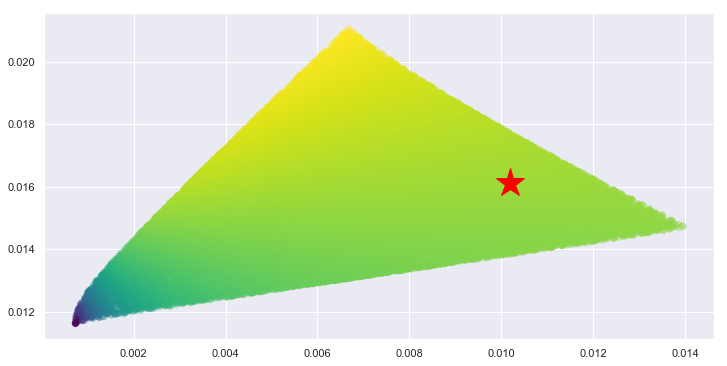

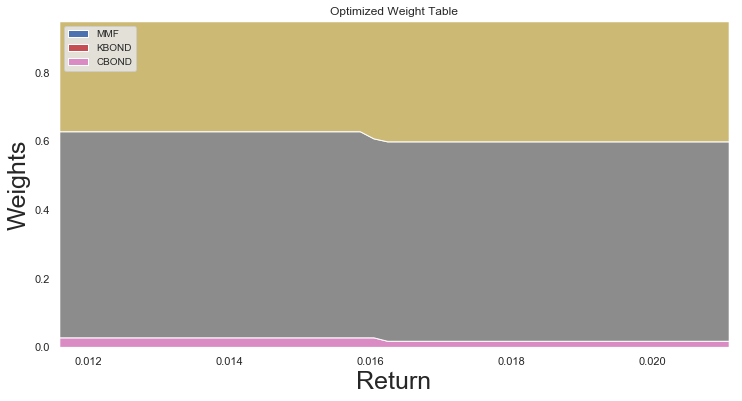

Optimization based on Equilibrium returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         1.90%  1.50%  0.07% 44812826995  6.30  1.79%   1.000 
KBOND      59.99%  1.72%  1.40% 44812826995  6.30  1.79%   0.052 1.000 
CBOND      33.05%  1.60%  0.67% 44812826995  6.30  1.79%   0.039 0.840 1.000 


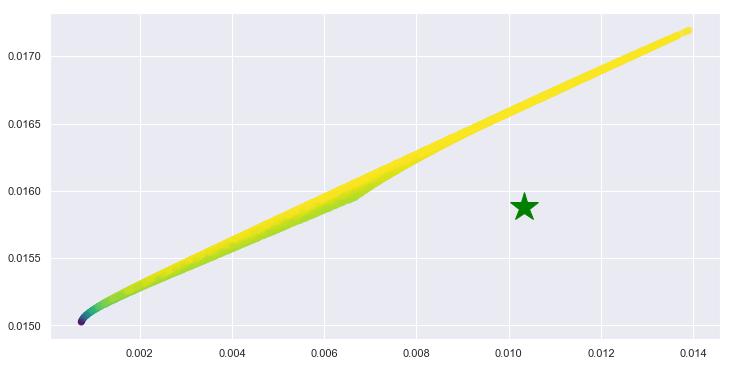

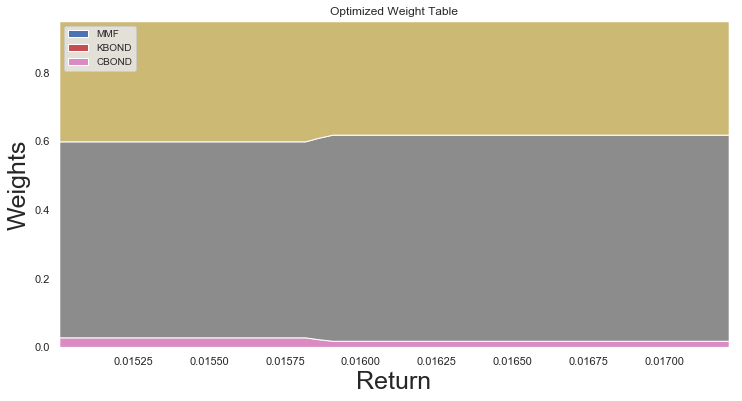

Views Matrix
[]
Link Matrix
[]
Optimization based on Equilibrium returns with adjusted views
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         1.90%  1.50%  0.07% 44812826995  6.30  1.79%   1.000 
KBOND      59.99%  1.72%  1.40% 44812826995  6.30  1.79%   0.052 1.000 
CBOND      33.05%  1.60%  0.67% 44812826995  6.30  1.79%   0.039 0.840 1.000 


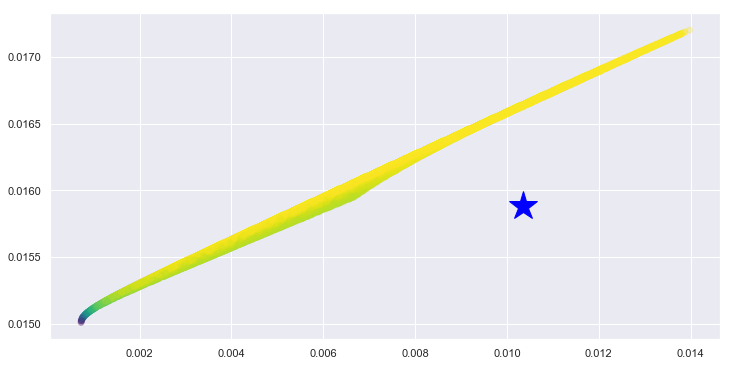

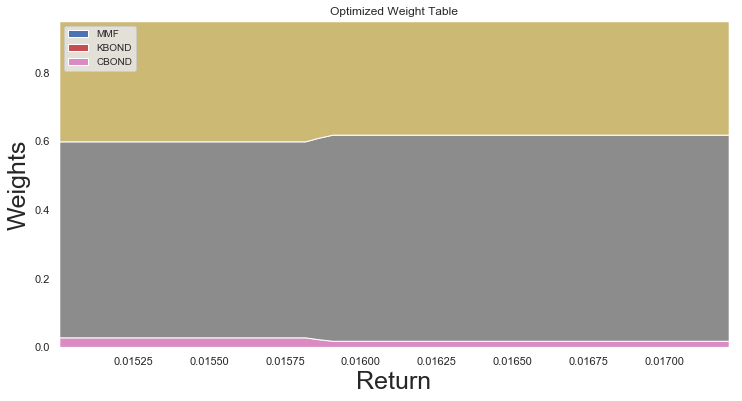

In [56]:


from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
import seaborn as sns
sns.set()
#from structures.quote import QuoteSeries
import scipy.optimize
import random
import pandas as pd
####################################
# Helper Functions
####################################
AUM = 65422e8
D1= 8.5
D2=2.84

IC1 = 0.0076
IC2 = 0.0069


def load_data_net():
    symbols = ['MMF', 'KBOND', 'CBOND']
    cap = {'MMF':1140000e8, 'KBOND': 11651406e8, 'CBOND': 6460232e8}

    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('BLM_project/%s.csv' % s, index_col=None)
        prices = list(dataframe[s])[-1250:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data_net()

from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
#from structures.quote import QuoteSeries
import scipy.optimize
import random
from math import log, exp

####################################
# Helper Functions
####################################
# Function takes historical stock prices together with market capitalizations and calculates
# names       - array of assets' names
# prices      - array of historical (daily) prices
# caps        - array of assets' market capitalizations
# returns:
# names       - array of assets' names
# weights     - array of assets' weights (derived from mkt caps)
# expreturns  - expected returns based on historical data
# covars          - covariance matrix between assets based on historical data

def assets_meanvar(names, prices, caps):
        prices = matrix(prices)                  # create numpy matrix from prices
        weights = array(caps) / sum(caps)       # create weights
        # create matrix of historical returns
        rows, cols = prices.shape
        returns = empty([rows, cols-1])
        for r in range(rows):
                for c in range(cols-1):
                        p0, p1 = prices[r,c], prices[r,c+1]
                        returns[r,c] = (p1/p0)-1

        # calculate expected returns   
        expreturns = array([])
        for r in range(rows):
                expreturns = append(expreturns, mean(returns[r]))

        # calculate covariances
        covars = cov(returns)

        expreturns = (1 + expreturns)**250-1      # Annualize expected returns
        # adjusting expreturns symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']

        adjust = array([-0.004, 0.015, 0.02])
        expreturns = expreturns + adjust
        
        covars = covars * 250                     # Annualize covariances

        return names, weights, expreturns, covars

# Calculates portfolio mean return
def port_mean(W, R):
        return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
        return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
        return port_mean(W, R), port_var(W, C)

# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
        def fitness(W, R, C, r):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var = port_mean_var(W, R, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = 50*abs(mean-r) #r은 optimized return
                return var + penalty
        frontier_mean, frontier_var, frontier_weights = [], [], []
        n = len(R)      # Number of assets in the portfolio
        for r in linspace(min(R), max(R), num=50): # Iterate through the range of returns on Y axis
                W = ones([n])/n       # start optimization with equal weights
                b_ = [(0.019,0.029), (0.,0.5999), (0.,0.3499)]        # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
                c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.9494 },  # Sum of weights must be 96%
                      {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM + 1000e8},  # sum of Credic IC
                      {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] - 0.01}, #Sum of port return
                      )     
                optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
                if not optimized.success:
                        raise BaseException(optimized.message)
                # add point to the min-var frontier [x,y] = [optimized.x, r]
                frontier_mean.append(r)                                                 # return
                frontier_var.append(port_var(optimized.x, C))   # min-variance based on optimized weights
                frontier_weights.append(optimized.x)
        return array(frontier_mean), array(frontier_var), frontier_weights
                                                                                                       
# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def solve_weights(R, C, rf):
        def fitness(W, R, C, rf):
                mean, var = port_mean_var(W, R, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        
        n = len(R)
        W = ones([n])/n # start optimization with equal weights
        b_ = [(0.019,0.029), (0.,0.5999), (0.,0.3499)]        # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.9494},  # Sum of weights must be 96%
              {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM + 1000e8},  # sum of Credic IC
              {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] - 0.01}, #Sum of port return
              )    
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s %8s %8s %8s %s" % ("Name", "Weight", "Return", "Dev", "CreditIC", " Duration", " PortReturn", "  Correlations"))
        for i in range(len(names)):
                print("%-10s %5.2f%% %5.2f%% %5.2f%% %5.f %5.2f %5.2f%%   " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5,
                                                                   AUM * (W[1] * IC1 + W[2] * IC2  + 0.506 * 0.00002),
                                                                   (W[1] * D1 + W[2] * D2 + 0.0506 * 5.1),
                                                                   100 * (W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + 0.0506 * 0.04)
                                                                   ), end='')
                for j in range(i+1):
                        corr = C[i,j] / (sqrt(C[i,i]) * (sqrt(C[j,j]))) # calculate correlation from covariance
                        print("%.3f " % corr, end='')
                print()


        
                
def optimize_and_display(title, names, R, C, rf, color='red'):
        # optimize
        W = solve_weights(R, C, rf)
        mean, var = port_mean_var(W, R, C)                              # calculate tangency portfolio
        f_mean, f_var, f_weights = solve_frontier(R, C, rf)             # calculate min-var frontier
        # display min-var frontier
        print(title)
        figure(figsize=(12,6))
        print_assets(names, W, R, C)
        n = len(names)
#         ###draw assets### 
#         scatter([sqrt(C[i,i]) for i in range(n)], R, cmap='viridis', marker='x',color=color)  # draw assets
#         for i in range(n):  # draw labels
#                text(sqrt(C[i,i]), R[i], '  %s'%names[i], verticalalignment='center', color=color,fontsize= 10)
        
        plot(sqrt(var), mean, marker='*', color=color, markersize =30)  # point tangency portfolio
#         scatter(var**.5, mean, marker='o', color=color) # draw tangency portfolio
        
# #         plot(sqrt(f_var), f_mean, color=color, marker="*", markersize=10) # draw min-var frontier
        
#         xlabel('$\sigma$', fontsize=25), ylabel('$r$', fontsize=25)
        
        # Conducted Random Portfolio scatter 
        RandomReturn, RandomVar = [], []
        for i in range(100000):
            weight = np.random.random(3) 
            weight = weight/sum(weight)
            RandomReturn.append(port_mean(weight, R))
            RandomVar.append(sqrt(port_var(weight,C)))
        RandomReturn = array(RandomReturn)
        RandomVar = array(RandomVar)
        scatter(RandomVar, RandomReturn, c = (RandomReturn-rf)/RandomVar, cmap='viridis', marker = 'o' ,alpha = 0.3 )
#         plt.ylim(0.013,0.03)
#         plt.xlim(0.,0.02)
        grid(True)
        show()
        
        #Display weights
        m = empty([n, len(f_weights)]) # num = 20개 solve_frontier 함수에서 최적화 개수(r, linspace)
        for i in range(n): # 9
            for j in range(m.shape[1]): #20, shape[0]은 행 shape[1] 은 열
                m[i,j] = f_weights[j][i]        
    
        figure(figsize=(12,6))
    
        for i in range(n) :
            stackplot(f_mean, m, labels=[names[i]])
        margins(0,0)
        legend(loc = 'upper left', fontsize = 10)
        plt.title("Optimized Weight Table")
        xlabel('Return', fontsize=25)
        ylabel('Weights', fontsize=25)
        show()
    


# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(names, views):
    
        r, c = len(views), len(names)
        Q = [views[i][3] for i in range(r)]     # view matrix
        P = zeros([r, c])                       # link matrix
        nameToIndex = dict()
        for i, n in enumerate(names):
                nameToIndex[n] = i
        for i, v in enumerate(views):
                name1, name2 = views[i][0], views[i][2]
                P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
                P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
        return array(Q), P

####################################
# Main
####################################
 
# Load names, prices, capitalizations from the data source(yahoo finance)
names, prices, caps = load_data_net()
n = len(names)

# Estimate assets's expected return and covariances
names, W, R, C = assets_meanvar(names, prices, caps)
rf = .015      # Risk-free rate

print("Historical Weights")
print_assets(names, W, R, C)

# Calculate portfolio historical return and variance
mean, var = port_mean_var(W, R, C)

# Mean-Variance Optimization (based on historical returns)
print("="*100)
optimize_and_display('Optimization based on Historical returns', names, R, C, rf, color='red')
show()

# Black-litterman reverse optimization
lmb = (mean - rf) / var                         # Calculate return/risk trade-off
Pi = dot(dot(lmb, C), W)                        # Calculate equilibrium excess returns

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns', names, Pi+rf, C, rf, color='green')
show()

#Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
#           ('MMF', '<', 'BENEFICIAL', 0.04),
#           ('AI', '>', 'MMF', 0.05),
#           ('MMF', '<', 'SDEPOSIT', 0.01),         
        ]
# views = [
#          ('AI', '>', 'KBOND', 0.04),
#          ('OTHERBOND', '>', 'CBOND', 0.015),
#         ('BENEFICIAL', '>', 'MMF', 0.05)
#         ]

#     ('AI', '>', 'MMF', 0.05),
#          ('MMF', '<', 'SDEPOSIT', 0.015),
#         ('MMF', '<', 'BENEFICIAL', 0.03)
Q, P = prepare_views_and_link_matrix(names, views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

tau = .03 # scaling factor

# Calculate omega - uncertainty matrix about views
omega = dot(dot(dot(tau, P), C), transpose(P)) # 0.025 * P * C * transpose(P)
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(dot(tau, C))
sub_b = dot(dot(transpose(P), inv(omega)), P)
sub_c = dot(inv(dot(tau, C)), Pi)
sub_d = dot(dot(transpose(P), inv(omega)), Q)
Pi = dot(inv(sub_a + sub_b), (sub_c + sub_d))

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns with adjusted views', names, Pi+rf, C, rf, color='blue')
show()


# ASSET-Linked Account

Historical Weights
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         5.92%  1.16%  0.07% 1093354911  6.23  1.77%   1.000 
KBOND      60.52%  1.47%  1.40% 1093354911  6.23  1.77%   0.052 1.000 
CBOND      33.56%  2.11%  0.67% 1093354911  6.23  1.77%   0.039 0.840 1.000 
Optimization based on Historical returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         2.38%  1.16%  0.07% 1099281632  6.06  1.77%   1.000 
KBOND      56.99%  1.47%  1.40% 1099281632  6.06  1.77%   0.052 1.000 
CBOND      37.99%  2.11%  0.67% 1099281632  6.06  1.77%   0.039 0.840 1.000 


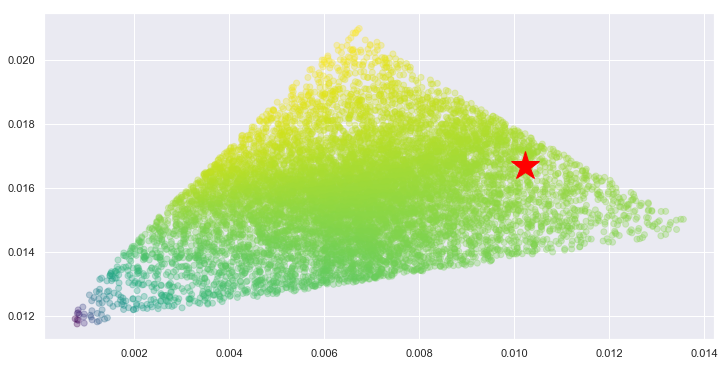

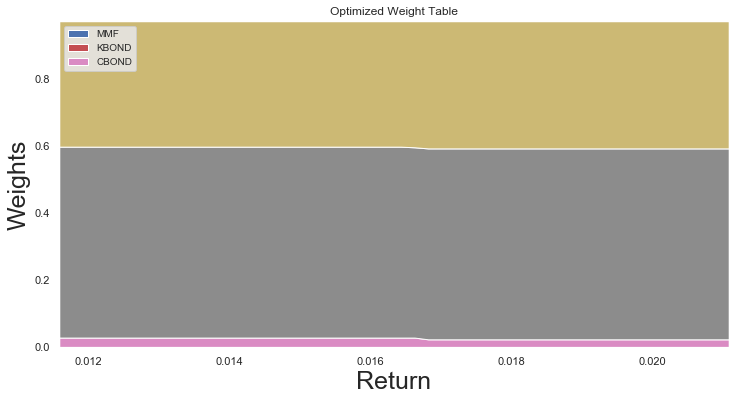

Optimization based on Equilibrium returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         2.38%  1.50%  0.07% 1099281632  6.06  1.73%   1.000 
KBOND      56.99%  1.72%  1.40% 1099281632  6.06  1.73%   0.052 1.000 
CBOND      37.99%  1.60%  0.67% 1099281632  6.06  1.73%   0.039 0.840 1.000 


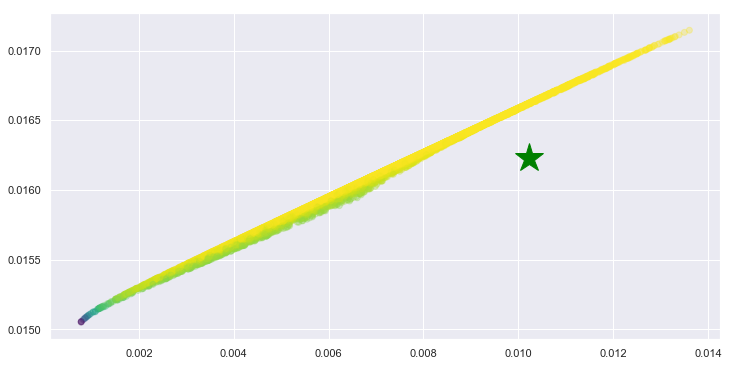

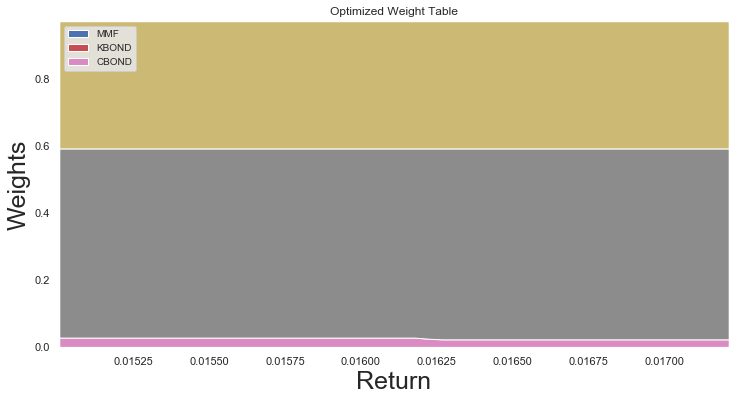

Views Matrix
[]
Link Matrix
[]
Optimization based on Equilibrium returns with adjusted views
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         2.38%  1.50%  0.07% 1099281632  6.06  1.73%   1.000 
KBOND      56.99%  1.72%  1.40% 1099281632  6.06  1.73%   0.052 1.000 
CBOND      37.99%  1.60%  0.67% 1099281632  6.06  1.73%   0.039 0.840 1.000 


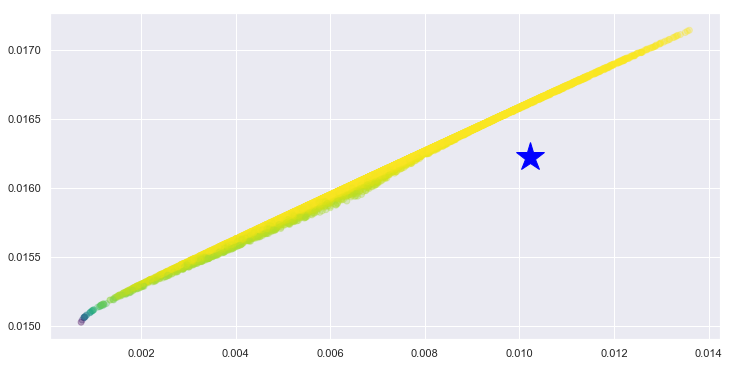

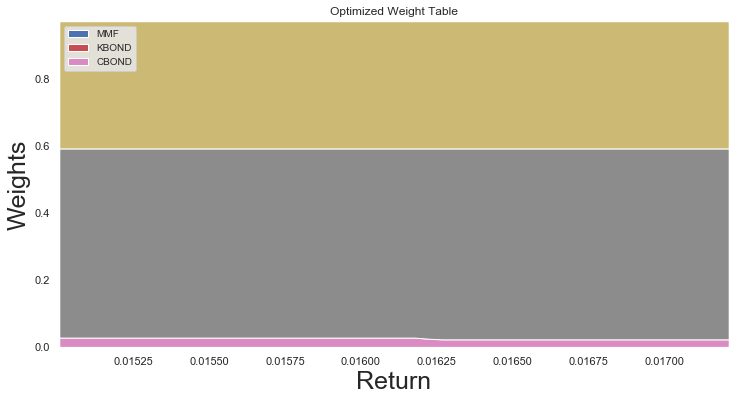

In [57]:
from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
import seaborn as sns
sns.set()
#from structures.quote import QuoteSeries
import scipy.optimize
import random
import pandas as pd
####################################
# Helper Functions
####################################
AUM = 1581e8
D1= 8.5
D2=2.84

IC1 = 0.0076
IC2 = 0.0069


def load_data_net():
    symbols = ['MMF', 'KBOND', 'CBOND']
    cap = {'MMF':1140000e8, 'KBOND': 11651406e8, 'CBOND': 6460232e8}

    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('BLM_project/%s.csv' % s, index_col=None)
        prices = list(dataframe[s])[-1250:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data_net()

from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
#from structures.quote import QuoteSeries
import scipy.optimize
import random
from math import log, exp

####################################
# Helper Functions
####################################
# Function takes historical stock prices together with market capitalizations and calculates
# names       - array of assets' names
# prices      - array of historical (daily) prices
# caps        - array of assets' market capitalizations
# returns:
# names       - array of assets' names
# weights     - array of assets' weights (derived from mkt caps)
# expreturns  - expected returns based on historical data
# covars          - covariance matrix between assets based on historical data
def assets_meanvar(names, prices, caps):
        prices = matrix(prices)                         # create numpy matrix from prices
        weights = array(caps) / sum(caps)       # create weights
        # create matrix of historical returns
        rows, cols = prices.shape
        returns = empty([rows, cols-1])
        for r in range(rows):
                for c in range(cols-1):
                        p0, p1 = prices[r,c], prices[r,c+1]
                        returns[r,c] = (p1/p0)-1

        # calculate expected returns   
        expreturns = array([])
        for r in range(rows):
                expreturns = append(expreturns, mean(returns[r]))

        # calculate covariances
        covars = cov(returns)

        expreturns = (1 + expreturns)**250-1      # Annualize expected returns
        # adjusting expreturns symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']

        adjust = array([-0.004, 0.015, 0.02])
        expreturns = expreturns + adjust
        
        covars = covars * 250                     # Annualize covariances

        return names, weights, expreturns, covars
    
#       rf              risk free rate
#       lmb             lambda - risk aversion coefficient
#       C               assets covariance matrix
#       V               assets variances (diagonal in covariance matrix)
#       W               assets weights
#       R               assets returns
#       mean    portfolio historical return
#       var             portfolio historical variance
#       Pi              portfolio equilibrium excess returns
#       tau     scaling factor for Black-litterman

# Calculates portfolio mean return
def port_mean(W, R):
        return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
        return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
        return port_mean(W, R), port_var(W, C)

# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
        def fitness(W, R, C, r):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var = port_mean_var(W, R, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = 50*abs(mean-r) #r은 optimized return
                return var + penalty
        frontier_mean, frontier_var, frontier_weights = [], [], []
        n = len(R)      # Number of assets in the portfolio
        for r in linspace(min(R), max(R), num=50): # Iterate through the range of returns on Y axis
                W = ones([n])/n       # start optimization with equal weights
                b_ = [(0.019,0.029), (0.,0.5699), (0.,0.3799)]       # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
                c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.9736},  # Sum of weights must be 96%
                      {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM + 1000e8},  # sum of Credic IC
                      {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] - 0.01}, #Sum of port return
                      )     
                optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
                if not optimized.success:
                        raise BaseException(optimized.message)
                # add point to the min-var frontier [x,y] = [optimized.x, r]
                frontier_mean.append(r)                                                 # return
                frontier_var.append(port_var(optimized.x, C))   # min-variance based on optimized weights
                frontier_weights.append(optimized.x)
        return array(frontier_mean), array(frontier_var), frontier_weights
                                                                                                       
# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def solve_weights(R, C, rf):
        def fitness(W, R, C, rf):
                mean, var = port_mean_var(W, R, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        
        n = len(R)
        W = ones([n])/n # start optimization with equal weights
        b_ = [(0.019,0.029), (0.,0.5699), (0.,0.3799)]        # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)-0.9736 },  # Sum of weights must be 96%
              {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM + 500e8},  # sum of Credic IC
              {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] - 0.01}, #Sum of port return
              )    
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s %8s %8s %8s %s" % ("Name", "Weight", "Return", "Dev", "CreditIC", " Duration", " PortReturn", "  Correlations"))
        for i in range(len(names)):
                print("%-10s %5.2f%% %5.2f%% %5.2f%% %5.f %5.2f %5.2f%%   " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5,
                                                                   AUM * (W[1] * IC1 + W[2] * IC2  + 0.0264 * 0.00002),
                                                                   (W[1] * D1 + W[2] * D2 + 0.0264 * 5.1),
                                                                   100 * (W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + 0.0264 * 0.04)
                                                                   ), end='')
                for j in range(i+1):
                        corr = C[i,j] / (sqrt(C[i,i]) * (sqrt(C[j,j]))) # calculate correlation from covariance
                        print("%.3f " % corr, end='')
                print()


        
                
def optimize_and_display(title, names, R, C, rf, color='red'):
        # optimize
        W = solve_weights(R, C, rf)
        mean, var = port_mean_var(W, R, C)                              # calculate tangency portfolio
        f_mean, f_var, f_weights = solve_frontier(R, C, rf)             # calculate min-var frontier
        # display min-var frontier
        print(title)
        figure(figsize=(12,6))
        print_assets(names, W, R, C)
        n = len(names)
#         ###draw assets### 
#         scatter([sqrt(C[i,i]) for i in range(n)], R, cmap='viridis', marker='x',color=color)  # draw assets
#         for i in range(n):  # draw labels
#                text(sqrt(C[i,i]), R[i], '  %s'%names[i], verticalalignment='center', color=color,fontsize= 10)
        
        plot(sqrt(var), mean, marker='*', color=color, markersize =30)  # point tangency portfolio
#         scatter(var**.5, mean, marker='o', color=color) # draw tangency portfolio
        
# #         plot(sqrt(f_var), f_mean, color=color, marker="*", markersize=10) # draw min-var frontier
        
#         xlabel('$\sigma$', fontsize=25), ylabel('$r$', fontsize=25)
        
        # Conducted Random Portfolio scatter 
        RandomReturn, RandomVar = [], []
        for i in range(10000):
            weight = np.random.random(3) 
            weight = weight/sum(weight)
            RandomReturn.append(port_mean(weight, R))
            RandomVar.append(sqrt(port_var(weight,C)))
        RandomReturn = array(RandomReturn)
        RandomVar = array(RandomVar)
        scatter(RandomVar, RandomReturn, c = (RandomReturn-rf)/RandomVar, cmap='viridis', marker = 'o' ,alpha = 0.3 )
#         plt.ylim(0.013,0.03)
#         plt.xlim(0.,0.02)
        grid(True)
        show()
        
        #Display weights
        m = empty([n, len(f_weights)]) # num = 20개 solve_frontier 함수에서 최적화 개수(r, linspace)
        for i in range(n): # 9
            for j in range(m.shape[1]): #20, shape[0]은 행 shape[1] 은 열
                m[i,j] = f_weights[j][i]        
    
        figure(figsize=(12,6))
    
        for i in range(n) :
            stackplot(f_mean, m, labels=[names[i]])
        margins(0,0)
        legend(loc = 'upper left', fontsize = 10)
        plt.title("Optimized Weight Table")
        xlabel('Return', fontsize=25)
        ylabel('Weights', fontsize=25)
        show()
    


# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(names, views):
    
        r, c = len(views), len(names)
        Q = [views[i][3] for i in range(r)]     # view matrix
        P = zeros([r, c])                       # link matrix
        nameToIndex = dict()
        for i, n in enumerate(names):
                nameToIndex[n] = i
        for i, v in enumerate(views):
                name1, name2 = views[i][0], views[i][2]
                P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
                P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
        return array(Q), P

####################################
# Main
####################################
 
# Load names, prices, capitalizations from the data source(yahoo finance)
names, prices, caps = load_data_net()
n = len(names)

# Estimate assets's expected return and covariances
names, W, R, C = assets_meanvar(names, prices, caps)
rf = .015      # Risk-free rate

print("Historical Weights")
print_assets(names, W, R, C)

# Calculate portfolio historical return and variance
mean, var = port_mean_var(W, R, C)

# Mean-Variance Optimization (based on historical returns)
print("="*100)
optimize_and_display('Optimization based on Historical returns', names, R, C, rf, color='red')
show()

# Black-litterman reverse optimization
lmb = (mean - rf) / var                         # Calculate return/risk trade-off
Pi = dot(dot(lmb, C), W)                        # Calculate equilibrium excess returns

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns', names, Pi+rf, C, rf, color='green')
show()

#Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
#           ('MMF', '<', 'BENEFICIAL', 0.04),
#           ('AI', '>', 'MMF', 0.05),
#           ('MMF', '<', 'SDEPOSIT', 0.01),         
        ]
# views = [
#          ('AI', '>', 'KBOND', 0.04),
#          ('OTHERBOND', '>', 'CBOND', 0.015),
#         ('BENEFICIAL', '>', 'MMF', 0.05)
#         ]

#     ('AI', '>', 'MMF', 0.05),
#          ('MMF', '<', 'SDEPOSIT', 0.015),
#         ('MMF', '<', 'BENEFICIAL', 0.03)
Q, P = prepare_views_and_link_matrix(names, views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

tau = .03 # scaling factor

# Calculate omega - uncertainty matrix about views
omega = dot(dot(dot(tau, P), C), transpose(P)) # 0.025 * P * C * transpose(P)
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(dot(tau, C))
sub_b = dot(dot(transpose(P), inv(omega)), P)
sub_c = dot(inv(dot(tau, C)), Pi)
sub_d = dot(dot(transpose(P), inv(omega)), Q)
Pi = dot(inv(sub_a + sub_b), (sub_c + sub_d))

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns with adjusted views', names, Pi+rf, C, rf, color='blue')
show()


# Retired Pension Account

Historical Weights
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         1.22%  1.16%  0.07% 73019671061  5.08  3.35%   1.000 
KBOND      12.50%  1.47%  1.40% 73019671061  5.08  3.35%   0.052 1.000 
CBOND       6.93%  2.11%  0.67% 73019671061  5.08  3.35%   0.039 0.840 1.000 
OTHERBOND   8.04%  2.90%  2.58% 73019671061  5.08  3.35%   0.029 0.923 0.839 1.000 
AI         65.94%  3.94%  1.13% 73019671061  5.08  3.35%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    5.36%  3.24%  0.01% 73019671061  5.08  3.35%   0.187 0.041 0.044 0.051 -0.016 1.000 
Optimization based on Historical returns
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         9.00%  1.16%  0.07% 33678060000  4.06  2.55%   1.000 
KBOND       7.99%  1.47%  1.40% 33678060000  4.06  2.55%   0.052 1.000 
CBOND      44.98%  2.11%  0.67% 33678060000  4.06  2.55%   0.039 0.840 1.000 
OTHERBOND  10.06%  2.90%  2.58% 33678060000  4.06  2.55%   0.029 0.923 0.839 1

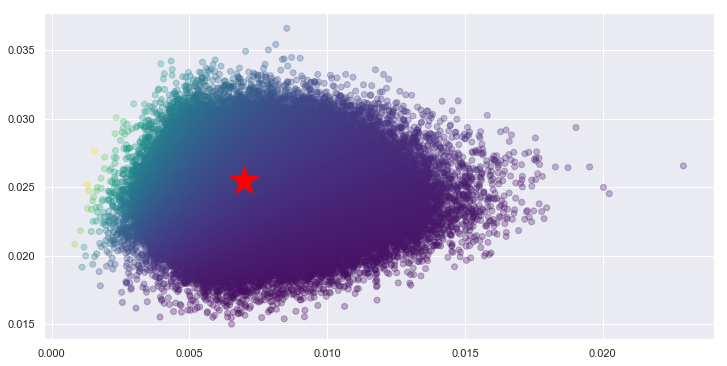

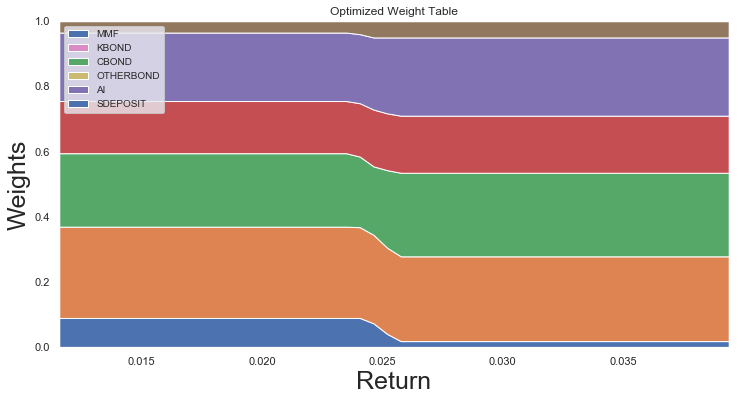

Views Matrix
[0.05 0.01]
Link Matrix
[[-1.  0.  0.  0.  1.  0.]
 [-1.  0.  0.  0.  0.  1.]]
Optimization based on Equilibrium returns with adjusted views
Name       Weight Return    Dev CreditIC  Duration  PortReturn   Correlations
MMF         9.00%  1.00%  0.07% 33678060000  4.06  2.74%   1.000 
KBOND       7.99%  2.41%  1.40% 33678060000  4.06  2.74%   0.052 1.000 
CBOND      44.98%  1.95%  0.67% 33678060000  4.06  2.74%   0.039 0.840 1.000 
OTHERBOND  10.06%  3.61%  2.58% 33678060000  4.06  2.74%   0.029 0.923 0.839 1.000 
AI         25.99%  4.58%  1.13% 33678060000  4.06  2.74%   0.016 -0.033 -0.020 -0.036 1.000 
SDEPOSIT    1.98%  1.50%  0.01% 33678060000  4.06  2.74%   0.187 0.041 0.044 0.051 -0.016 1.000 


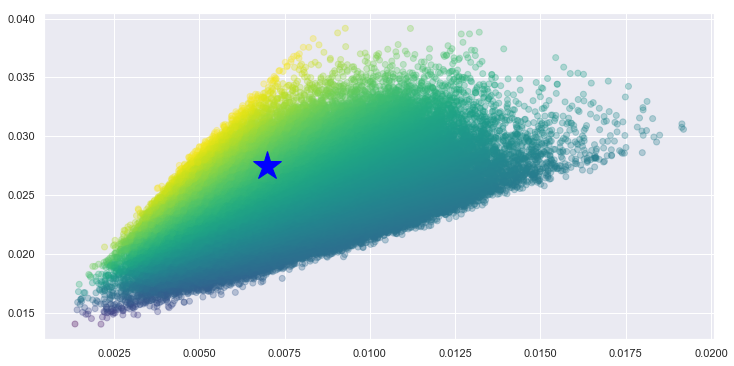

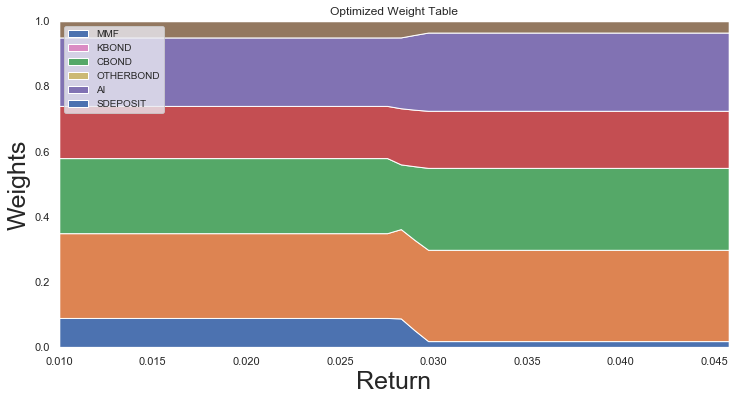

In [58]:


from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
import seaborn as sns
sns.set()
#from structures.quote import QuoteSeries
import scipy.optimize
import random
import pandas as pd
####################################
# Helper Functions
####################################
AUM = 10000e8
D1= 8.5
D2=2.84
D3=8.638
D4=4.7
D5=0.45


IC1 = 0.0076
IC2 = 0.0069
IC3 = 0.02569
IC4 = 0.10414
IC5 = 0.016

def load_data_net():
    symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT']
    cap = {'MMF':1140000e8, 'KBOND': 11651406e8, 'CBOND': 6460232e8, 'OTHERBOND':7497330e8, 'AI': 61457143e8, 'SDEPOSIT': 5000000e8}

    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('BLM_project/%s.csv' % s, index_col=None)
        prices = list(dataframe[s])[-1250:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data_net()

from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
#from structures.quote import QuoteSeries
import scipy.optimize
import random
from math import log, exp

####################################
# Helper Functions
####################################
# Function takes historical stock prices together with market capitalizations and calculates
# names       - array of assets' names
# prices      - array of historical (daily) prices
# caps        - array of assets' market capitalizations
# returns:
# names       - array of assets' names
# weights     - array of assets' weights (derived from mkt caps)
# expreturns  - expected returns based on historical data
# covars          - covariance matrix between assets based on historical data
def assets_meanvar(names, prices, caps):
        prices = matrix(prices)                         # create numpy matrix from prices
        weights = array(caps) / sum(caps)       # create weights
        # create matrix of historical returns
        rows, cols = prices.shape
        returns = empty([rows, cols-1])
        for r in range(rows):
                for c in range(cols-1):
                        p0, p1 = prices[r,c], prices[r,c+1]
                        returns[r,c] = (p1/p0)-1

        # calculate expected returns   
        expreturns = array([])
        for r in range(rows):
                expreturns = append(expreturns, mean(returns[r]))

        # calculate covariances
        covars = cov(returns)

        expreturns = (1 + expreturns)**250-1      # Annualize expected returns
        # adjusting expreturns symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT', 'STOCK', 'BENEFICIAL']

        adjust = array([-0.004, 0.015, 0.02 , 0.025, 0.031, 0.016])
        expreturns = expreturns + adjust
        
        covars = covars * 250                     # Annualize covariances

        return names, weights, expreturns, covars
    
#       rf              risk free rate
#       lmb             lambda - risk aversion coefficient
#       C               assets covariance matrix
#       V               assets variances (diagonal in covariance matrix)
#       W               assets weights
#       R               assets returns
#       mean    portfolio historical return
#       var             portfolio historical variance
#       Pi              portfolio equilibrium excess returns
#       tau     scaling factor for Black-litterman

# Calculates portfolio mean return
def port_mean(W, R):
        return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
        return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
        return port_mean(W, R), port_var(W, C)

# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
        def fitness(W, R, C, r):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var = port_mean_var(W, R, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = 50*abs(mean-r) #r은 optimized return
                return var + penalty
        frontier_mean, frontier_var, frontier_weights = [], [], []
        n = len(R)      # Number of assets in the portfolio
        for r in linspace(min(R), max(R), num=50): # Iterate through the range of returns on Y axis
                W = ones([n])/n       # start optimization with equal weights
                b_ = [(0.019,0.09), (0.2599,0.2799), (0.0901,0.45),(0.16, 0.175),(0.2099,0.2399),(0.035,0.05)]         # weights for boundaries between 0%..100%. No leverage, no shorting
                # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT']
                c_ = ({'type':'eq', 'fun': lambda W: sum(W)- 1. },  # Sum of weights must be 96%
                      {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM - W[3] * IC3 * AUM 
                         - W[4] * IC4 * AUM - W[5] * IC5 * AUM  + 1000e8},  # sum of Credic IC
                      {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] - 0.01}, #Sum of port return
                     #Sum of port return
                     )     
                optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
                if not optimized.success:
                        raise BaseException(optimized.message)
                # add point to the min-var frontier [x,y] = [optimized.x, r]
                frontier_mean.append(r)                                                 # return
                frontier_var.append(port_var(optimized.x, C))   # min-variance based on optimized weights
                frontier_weights.append(optimized.x)
        return array(frontier_mean), array(frontier_var), frontier_weights
                                                                                                       
# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def solve_weights(R, C, rf):
        def fitness(W, R, C, rf):
                mean, var = port_mean_var(W, R, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        
        n = len(R)
        W = ones([n])/n # start optimization with equal weights
        b_ = [(0.,0.09), (0.,0.0799), (0,0.4498),(0., 0.1199),(0.2099,0.2599),(0,0.0198)]         # weights for boundaries between 0%..100%. No leverage, no shorting
        # symbols = ['MMF', 'KBOND', 'CBOND', 'OTHERBOND', 'AI', 'SDEPOSIT']
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)- 1. },  # Sum of weights must be 96%
              {'type':'ineq', 'fun': lambda W:- W[1] * IC1 * AUM - W[2] * IC2 * AUM - W[3] * IC3 * AUM 
                 - W[4] * IC4 * AUM - W[5] * IC5 * AUM  + 500e8},  # sum of Credic IC
              {'type':'ineq', 'fun': lambda W: W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5] - 0.01}, #Sum of port return
             #Sum of port return
             )     
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s %8s %8s %8s %s" % ("Name", "Weight", "Return", "Dev", "CreditIC", " Duration", " PortReturn", "  Correlations"))
        for i in range(len(names)):
                print("%-10s %5.2f%% %5.2f%% %5.2f%% %5.f %5.2f %5.2f%%   " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5,
                                                                   AUM * (W[1] * IC1 + W[2] * IC2 + W[3] * IC3  
                                                                   + W[4] * IC4 + W[5] * IC5),
                                                                   (W[1] * D1 + W[2] * D2 + W[3] * D3  + W[4] * D4 + W[5] * D5), 
                                                                   100 * (W[0] * R[0] + W[1] * R[1] + W[2] * R[2] + W[3] * R[3] + W[4] * R[4] + W[5] * R[5])
                                                                       
                                                                   ), end='')
                for j in range(i+1):
                        corr = C[i,j] / (sqrt(C[i,i]) * (sqrt(C[j,j]))) # calculate correlation from covariance
                        print("%.3f " % corr, end='')
                print()


        
                
def optimize_and_display(title, names, R, C, rf, color='red'):
        # optimize
        W = solve_weights(R, C, rf)
        mean, var = port_mean_var(W, R, C)                              # calculate tangency portfolio
        f_mean, f_var, f_weights = solve_frontier(R, C, rf)             # calculate min-var frontier
        # display min-var frontier
        print(title)
        figure(figsize=(12,6))
        print_assets(names, W, R, C)
        n = len(names)
#         ###draw assets### 
#         scatter([sqrt(C[i,i]) for i in range(n)], R, cmap='viridis', marker='x',color=color)  # draw assets
#         for i in range(n):  # draw labels
#                text(sqrt(C[i,i]), R[i], '  %s'%names[i], verticalalignment='center', color=color,fontsize= 10)
        
        plot(sqrt(var), mean, marker='*', color=color, markersize =30)  # point tangency portfolio
#         scatter(var**.5, mean, marker='o', color=color) # draw tangency portfolio
        
# #         plot(sqrt(f_var), f_mean, color=color, marker="*", markersize=10) # draw min-var frontier
        
#         xlabel('$\sigma$', fontsize=25), ylabel('$r$', fontsize=25)
        
        # Conducted Random Portfolio scatter 
        RandomReturn, RandomVar = [], []
        for i in range(100000):
            weight = np.random.random(6) 
            weight = weight/sum(weight)
            RandomReturn.append(port_mean(weight, R))
            RandomVar.append(sqrt(port_var(weight,C)))
        RandomReturn = array(RandomReturn)
        RandomVar = array(RandomVar)
        scatter(RandomVar, RandomReturn, c = (RandomReturn-rf)/RandomVar, cmap='viridis', marker = 'o' ,alpha = 0.3 )
#         plt.ylim(0.013,0.03)
#         plt.xlim(0.,0.02)
        grid(True)
        show()
        
        #Display weights
        m = empty([n, len(f_weights)]) # num = 20개 solve_frontier 함수에서 최적화 개수(r, linspace)
        for i in range(n): # 9
            for j in range(m.shape[1]): #20, shape[0]은 행 shape[1] 은 열
                m[i,j] = f_weights[j][i]        
    
        figure(figsize=(12,6))
    
        for i in range(n) :
            stackplot(f_mean, m, labels=[names[i]])
        margins(0,0)
        legend(loc = 'upper left', fontsize = 10)
        plt.title("Optimized Weight Table")
        xlabel('Return', fontsize=25)
        ylabel('Weights', fontsize=25)
        show()
    


# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(names, views):
    
        r, c = len(views), len(names)
        Q = [views[i][3] for i in range(r)]     # view matrix
        P = zeros([r, c])                       # link matrix
        nameToIndex = dict()
        for i, n in enumerate(names):
                nameToIndex[n] = i
        for i, v in enumerate(views):
                name1, name2 = views[i][0], views[i][2]
                P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
                P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
        return array(Q), P

####################################
# Main
####################################
 
# Load names, prices, capitalizations from the data source(yahoo finance)
names, prices, caps = load_data_net()
n = len(names)

# Estimate assets's expected return and covariances
names, W, R, C = assets_meanvar(names, prices, caps)
rf = .015      # Risk-free rate

print("Historical Weights")
print_assets(names, W, R, C)

# Calculate portfolio historical return and variance
mean, var = port_mean_var(W, R, C)

# Mean-Variance Optimization (based on historical returns)
print("="*100)
optimize_and_display('Optimization based on Historical returns', names, R, C, rf, color='red')
show()

# Black-litterman reverse optimization
lmb = (mean - rf) / var                         # Calculate return/risk trade-off
Pi = dot(dot(lmb, C), W)                        # Calculate equilibrium excess returns

# Mean-variance Optimization (based on equilibrium returns)
# print("="*100)
# optimize_and_display('Optimization based on Equilibrium returns', names, Pi+rf, C, rf, color='green')
# show()

#Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
          ('AI', '>', 'MMF', 0.05),
          ('MMF', '<', 'SDEPOSIT', 0.01),           
        ]
# views = [
#          ('AI', '>', 'KBOND', 0.04),
#          ('OTHERBOND', '>', 'CBOND', 0.015),
#         ('BENEFICIAL', '>', 'MMF', 0.05)
#         ]

#     ('AI', '>', 'MMF', 0.05),
#          ('MMF', '<', 'SDEPOSIT', 0.015),
#         ('MMF', '<', 'BENEFICIAL', 0.03)
Q, P = prepare_views_and_link_matrix(names, views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

tau = .03 # scaling factor

# Calculate omega - uncertainty matrix about views
omega = dot(dot(dot(tau, P), C), transpose(P)) # 0.025 * P * C * transpose(P)
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(dot(tau, C))
sub_b = dot(dot(transpose(P), inv(omega)), P)
sub_c = dot(inv(dot(tau, C)), Pi)
sub_d = dot(dot(transpose(P), inv(omega)), Q)
Pi = dot(inv(sub_a + sub_b), (sub_c + sub_d))

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns with adjusted views', names, Pi+rf, C, rf, color='blue')
show()
